## Рубежный контроль №1 по курсу ТМО
### Выполнила Голубкова София, группа РТ5-61Б
*Задача №1.*
Для заданного набора данных проведите **корреляционный анализ**. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.
Для пары произвольных колонок данных построить график "Jointplot".

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка данных и основные характеристики датасета

In [3]:
data = pd.read_csv('../datasets/toy_dataset.csv', sep=",")
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [4]:
# размер датасета 150000 строк и 6 столбцов
data.shape

(150000, 6)

In [5]:
# cписок колонок с типами данных
data.dtypes

Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

In [6]:
# проверим есть ли пропущенные значения - все колонки заполнены
data.isnull().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

In [7]:
# основные статистические характеристки набора данных
data.describe()

,Number,Age,Income
count,150000.000000,150000.000000,150000.000000
mean,75000.500000,44.950200,91252.798273
std,43301.414527,11.572486,24989.500948
min,1.000000,25.000000,-654.000000
25%,37500.750000,35.000000,80867.750000
50%,75000.500000,45.000000,93655.000000
75%,112500.250000,55.000000,104519.000000
max,150000.000000,65.000000,177157.000000


#### Преобразуем категориальные признаки в числовые

In [9]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()
# проведем кодирование целочисленными значениями для колонки "Illness"
illness_enc_le = le.fit_transform(data['Illness'])

In [18]:
data['Illness'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
np.unique(illness_enc_le)

array([0, 1])

In [20]:
#добавим новый столбец 
data['illness_enc_le'] = illness_enc_le

In [21]:
data.head()

,Number,City,Gender,Age,Income,Illness,illness_enc_le
0,1,Dallas,Male,41,40367.0,No,0
1,2,Dallas,Male,54,45084.0,No,0
2,3,Dallas,Male,42,52483.0,No,0
3,4,Dallas,Male,40,40941.0,No,0
4,5,Dallas,Male,46,50289.0,No,0


In [22]:
# кодирование для колонки "City"
city_enc_le = le.fit_transform(data['City'])

In [23]:
data['City'].unique()

array(['Dallas', 'New York City', 'Los Angeles', 'Mountain View',
       'Boston', 'Washington D.C.', 'San Diego', 'Austin'], dtype=object)

In [24]:
np.unique(city_enc_le) 

array([0, 1, 2, 3, 4, 5, 6, 7])

In [28]:
# новый столбец
data['city_enc_le'] = city_enc_le
data.head()

,Number,City,Gender,Age,Income,Illness,illness_enc_le,city_enc_le
0,1,Dallas,Male,41,40367.0,No,0,2
1,2,Dallas,Male,54,45084.0,No,0,2
2,3,Dallas,Male,42,52483.0,No,0,2
3,4,Dallas,Male,40,40941.0,No,0,2
4,5,Dallas,Male,46,50289.0,No,0,2


In [31]:
# кодирование для колонки "Gender"
gender_enc_le = le.fit_transform(data['Gender'])

In [32]:
data['Gender'].unique(), np.unique(gender_enc_le) 

(array(['Male', 'Female'], dtype=object), array([0, 1]))

In [33]:
# новый столбец
data['gender_enc_le'] = gender_enc_le
data.head()

,Number,City,Gender,Age,Income,Illness,illness_enc_le,city_enc_le,gender_enc_le
0,1,Dallas,Male,41,40367.0,No,0,2,1
1,2,Dallas,Male,54,45084.0,No,0,2,1
2,3,Dallas,Male,42,52483.0,No,0,2,1
3,4,Dallas,Male,40,40941.0,No,0,2,1
4,5,Dallas,Male,46,50289.0,No,0,2,1


In [43]:
# удалим столбец номеров, т.к. он является лишним для наших целей

## Информация о корреляции признаков

In [45]:
# метод Пиросона
data.corr()

,Age,Income,illness_enc_le,city_enc_le,gender_enc_le
Age,1.000000,-0.001318,0.001811,-0.000636,-0.003653
Income,-0.001318,1.000000,0.000298,0.234541,0.198888
illness_enc_le,0.001811,0.000298,1.000000,-0.001712,0.001297
city_enc_le,-0.000636,0.234541,-0.001712,1.000000,0.002188
gender_enc_le,-0.003653,0.198888,0.001297,0.002188,1.000000


Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

В данном наборе данных точно не указано, что можно считать за целевой признак. Я предполагаю, что это могут быть признаки "Пол" или "Болезнь", мужчина/женщина(1/0) или болен/не болен(1/0) соответсвтенно.

**На основе корреляционной матрицы можно сделать следующие *выводы*:**
   * Признаки в модели довольно *слабо коррелируют* меджу собой.
   * Отчасти корреляция наблюдается между признаками "Доход" и "Пол" (0.2). Если считать "Пол" целевым признаком, то признак "Доход" нам, вероятнее всего, стоит оставить в модели.
   * Наблюдается небольшая корреляция между призаками "Город" и "Доход". Так как эти два признака не рассматриваются как целевые, то мы могли бы сделать вывод о том, что один из этих призанков следует исключить, но в нашем случае корреляция 0.23, значит такой вывод мы сделать не можем. При этом имея более сильную корреляцию, мы бы отавили признак "Доход", т.к. он больше скоррелирован с целевым признаком "Пол".
   * Рассматривая признак "Пол" как целевой, мы наблюдаем слабую корреляцию с признаком "Болезнь" (0.001), а также с некоторыми другими признаками. Их можно бы было исключить.
   * Также рассматривая признак "Болезнь" как целевой, мы наблюдаем слабую корреляцию с признаками "Доход" (0.0002) и "Возраст" (0.002), а также с некоторыми другими признаками. Их можно бы было исключить из модели.
   * Стоит отметить, что [данный датасет](https://www.kaggle.com/carlolepelaars/toy-dataset) является "игрушечным", и корреляционный анализ для него выпонен с использованем моих личных предположений.

In [46]:
# метод Кендалла
data.corr(method='kendall')

,Age,Income,illness_enc_le,city_enc_le,gender_enc_le
Age,1.000000,-0.000978,0.001498,-0.001181,-0.003002
Income,-0.000978,1.000000,0.000884,0.154632,0.206447
illness_enc_le,0.001498,0.000884,1.000000,-0.001604,0.001297
city_enc_le,-0.001181,0.154632,-0.001604,1.000000,0.002355
gender_enc_le,-0.003002,0.206447,0.001297,0.002355,1.000000


In [47]:
# метод Спирмана
data.corr(method='spearman')

,Age,Income,illness_enc_le,city_enc_le,gender_enc_le
Age,1.000000,-0.001452,0.001812,-0.001606,-0.003632
Income,-0.001452,1.000000,0.001082,0.239658,0.252843
illness_enc_le,0.001812,0.001082,1.000000,-0.001806,0.001297
city_enc_le,-0.001606,0.239658,-0.001806,1.000000,0.002652
gender_enc_le,-0.003632,0.252843,0.001297,0.002652,1.000000


Метод Спирмана показывает немного более высокую корреляцию признаков в данном случае.

#### Тепловая карта
Для визуализации корреляционной матрицы можно использовать "тепловую карту" **heatmap**, которая показывает степень корреляции различными цветами.

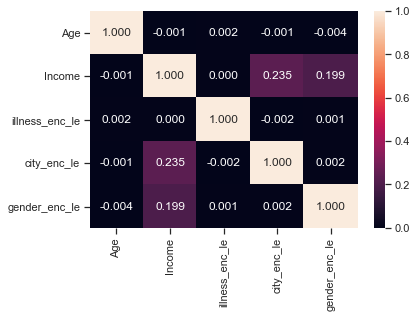

In [50]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')

## График "Jointplot"

Комбинация гистограмм и диаграмм рассеивания.

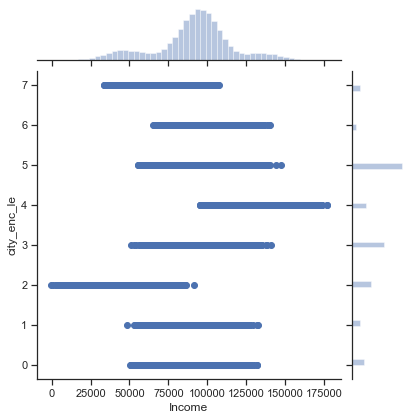

In [58]:
sns.jointplot(x='Income', y='city_enc_le', data=data)